In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [3]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [4]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [5]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [6]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

In [7]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

In [8]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [9]:
print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1145, 1694, 1, 1721, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3666, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1694, 1021, 1, 4997, 807, 1866, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1606, 4998, 543, 492, 1, 1444, 4741, 778, 1320, 1, 1863, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [10]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In [12]:
print(train_sequences[10])

[2431, 1, 225, 4995, 22, 641, 587, 225, 4995, 1, 1, 1663, 1, 1, 2431, 22, 565, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2307, 1, 1145, 1694, 1, 1721, 4996, 1, 1, 1, 1, 1, 4738, 1, 1, 122, 4515, 1, 2, 2873, 1506, 352, 4739, 1, 52, 341, 1, 352, 2172, 3962, 41, 22, 3795, 1, 1, 1, 1, 543, 1, 1, 1, 835, 631, 2366, 347, 4740, 1, 365, 22, 1, 787, 2367, 1, 4302, 138, 10, 1, 3666, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4995, 1, 600, 1, 1694, 1021, 1, 4997, 807, 1866, 117, 1, 1, 1, 2973, 22, 1, 99, 278, 1, 1606, 4998, 543, 492, 1, 1444, 4741, 778, 1320, 1, 1863, 10, 33, 641, 319, 1, 62, 478, 565, 301, 1507, 22, 479, 1, 1, 1666, 1, 797, 1, 3066, 1, 1365, 6, 1, 2431, 565, 22, 2970, 4735, 1, 1, 1, 1, 1, 850, 39, 1826, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1507, 1343, 374, 20, 63, 883, 1096, 4303, 247]


In [13]:
print(train_padded[10])

[2431    1  225 4995   22  641  587  225 4995    1    1 1663    1    1
 2431   22  565    1    1  140  278    1  140  278  796  822  662 2307
    1 1145 1694    1 1721 4996    1    1    1    1    1 4738    1    1
  122 4515    1    2 2873 1506  352 4739    1   52  341    1  352 2172
 3962   41   22 3795    1    1    1    1  543    1    1    1  835  631
 2366  347 4740    1  365   22    1  787 2367    1 4302  138   10    1
 3666  682 3532    1   22    1  414  822  662    1   90   13  633    1
  225 4995    1  600    1 1694 1021    1 4997  807 1866  117    1    1
    1 2973   22    1   99  278    1 1606 4998  543  492    1 1444 4741
  778 1320    1 1863   10   33  641  319    1   62  478  565  301 1507
   22  479    1    1 1666    1  797    1 3066    1 1365    6    1 2431
  565   22 2970 4735    1    1    1    1    1  850   39 1826  675  297
   26  979    1  882   22  361   22   13  301 1507 1343  374   20   63
  883 1096 4303  247    0    0    0    0    0    0    0    0    0    0
    0 

In [14]:
print(train_sequences[0])

[91, 160, 1142, 1106, 49, 979, 755, 1, 89, 1304, 4289, 129, 175, 3654, 1215, 1196, 1576, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3263, 1216, 2421, 570, 451, 1376, 58, 3379, 3522, 1661, 8, 921, 730, 10, 844, 1, 9, 599, 1577, 1107, 395, 1942, 1106, 731, 49, 538, 1398, 2013, 1622, 134, 249, 113, 2355, 795, 4980, 980, 584, 10, 3957, 3958, 921, 2562, 129, 344, 175, 3654, 1, 1, 39, 62, 2866, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1423, 71, 4502, 436, 4981, 91, 1107, 77, 1, 82, 2014, 53, 1, 91, 6, 1008, 591, 89, 1304, 91, 1965, 131, 137, 420, 9, 2867, 38, 152, 1234, 89, 1304, 4724, 7, 436, 4981, 3154, 6, 2492, 1, 431, 1127, 1, 1424, 571, 1235, 1904, 1, 766, 9, 538, 1398, 2013, 134, 2070, 400, 845, 1966, 1599, 34, 1717, 2868, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1173, 1197, 152, 720, 592, 1, 124, 28, 1305, 1690, 432, 83, 933, 115, 20, 14, 18, 3155, 1, 37, 1484, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1966, 1359, 328, 1, 299, 732, 1174, 18, 2869, 1717, 1, 294, 756, 1074, 395, 2015, 387, 431

In [15]:
print(train_padded[0])

[  91  160 1142 1106   49  979  755    1   89 1304 4289  129  175 3654
 1215 1196 1576   42    7  893   91    1  334   85   20   14  130 3263
 1216 2421  570  451 1376   58 3379 3522 1661    8  921  730   10  844
    1    9  599 1577 1107  395 1942 1106  731   49  538 1398 2013 1622
  134  249  113 2355  795 4980  980  584   10 3957 3958  921 2562  129
  344  175 3654    1    1   39   62 2866   28    9 4723   18 1305  136
  416    7  143 1423   71 4502  436 4981   91 1107   77    1   82 2014
   53    1   91    6 1008  591   89 1304   91 1965  131  137  420    9
 2867   38  152 1234   89 1304 4724    7  436 4981 3154    6 2492    1
  431 1127    1 1424  571 1235 1904    1  766    9  538 1398 2013  134
 2070  400  845 1966 1599   34 1717 2868    1    1 2422  244    9 2624
   82  732    6 1173 1197  152  720  592    1  124   28 1305 1690  432
   83  933  115   20   14   18 3155    1   37 1484    1   23   37   87
  335 2356   37  467  255 1966 1359  328    1  299  732 1174   18 2869
 1717 

In [16]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [17]:
print(set(labels))

{'sport', 'politics', 'business', 'entertainment', 'tech'}


In [18]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [19]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [20]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/10
1780/1780 - 9s - loss: 1.5732 - accuracy: 0.2871 - val_loss: 1.2777 - val_accuracy: 0.3685
Epoch 2/10
1780/1780 - 5s - loss: 1.1751 - accuracy: 0.4719 - val_loss: 1.2760 - val_accuracy: 0.4067
Epoch 3/10
1780/1780 - 5s - loss: 0.7568 - accuracy: 0.7472 - val_loss: 0.5723 - val_accuracy: 0.7933
Epoch 4/10
1780/1780 - 5s - loss: 0.2435 - accuracy: 0.9371 - val_loss: 0.2507 - val_accuracy: 0.9371
Epoch 5/10
1780/1780 - 5s - loss: 0.0451 - accuracy: 0.9910 - val_loss: 0.2060 - val_accuracy: 0.9371
Epoch 6/10
1780/1780 - 5s - loss: 0.0129 - accuracy: 0.9978 - val_loss: 0.1680 - val_accuracy: 0.9506
Epoch 7/10
1780/1780 - 5s - loss: 0.0080 - accuracy: 0.9989 - val_loss: 0.1666 - val_accuracy: 0.9483
Epoch 8/10
1780/1780 - 5s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1637 - val_accuracy: 0.9618
Epoch 9/10
1780/1780 - 5s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1707 - val_accuracy: 0.9618
Epoch 10/10
1780/1780 - 5s - loss: 

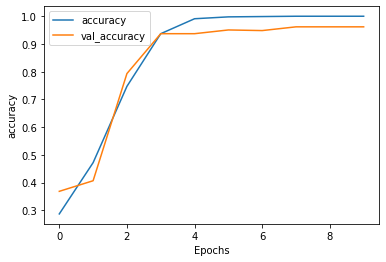

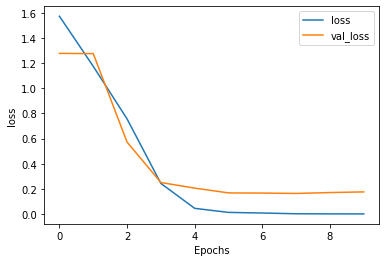

In [25]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(pred, labels[np.argmax(pred)])

[[2.2909015e-05 9.8399794e-01 1.0172065e-03 5.7833669e-05 1.3471981e-02
  1.4321870e-03]] bussiness
